## Emojify using Convolution Neural Networks

## 1. Importing the libraries

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2. Importing the datasets

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/data.zip','r') as obj:
  obj.extractall('/content/')

In [ ]:
train_dir = 'data/train'
val_dir = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

## 3. Reading the images from the Facial Emotion Recognition dataset

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## 3. Generating the train and validation data

In [ ]:
print("Size of training dataset: ",len(train_generator))
print("Size of test dataset: ",len(validation_generator))
print("----------------Each training dataset image contains-----------------")
print("1. ",len(train_generator),"rows")
print("2. ",len(train_generator[0]),"columns")
print("----------------Each test dataset image contains-----------------")
print("1. ",len(validation_generator),"rows")
print("2. ",len(validation_generator[0]),"columns\n\n")
print("Sample image contents: ")
print("--------------------------------------------------------------------")
print(train_generator[1][0])
print(train_generator[1][1])

Size of training dataset:  449
Size of test dataset:  113
----------------Each training dataset image contains-----------------
1.  449 rows
2.  2 columns
----------------Each test dataset image contains-----------------
1.  113 rows
2.  2 columns


Sample image contents: 
--------------------------------------------------------------------
[[[[0.28235295]
   [0.29803923]
   [0.2392157 ]
   ...
   [0.83921576]
   [0.8431373 ]
   [0.8470589 ]]

  [[0.2627451 ]
   [0.2392157 ]
   [0.227451  ]
   ...
   [0.85098046]
   [0.854902  ]
   [0.8588236 ]]

  [[0.25490198]
   [0.24313727]
   [0.25882354]
   ...
   [0.85098046]
   [0.85098046]
   [0.854902  ]]

  ...

  [[0.15686275]
   [0.14901961]
   [0.18431373]
   ...
   [0.7019608 ]
   [0.5372549 ]
   [0.7607844 ]]

  [[0.15686275]
   [0.16470589]
   [0.19607845]
   ...
   [0.77647066]
   [0.5294118 ]
   [0.6901961 ]]

  [[0.13333334]
   [0.18823531]
   [0.20392159]
   ...
   [0.7803922 ]
   [0.64705884]
   [0.57254905]]]


 [[[0.5921569 ]
  

## 4. Visualizing 7 types of emotion images

The face emotion is:  angry


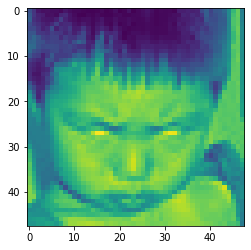

The face emotion is:  disgust


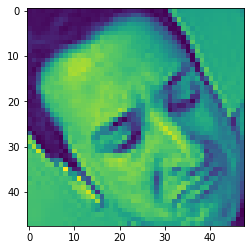

The face emotion is:  fear


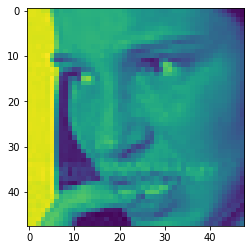

The face emotion is:  happy


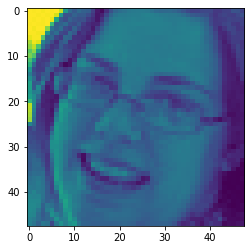

The face emotion is:  neutral


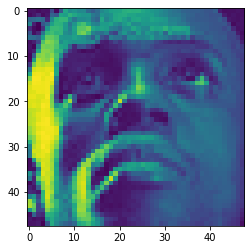

The face emotion is:  sad


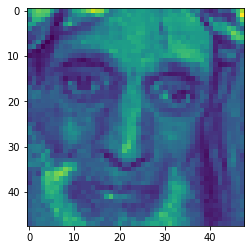

The face emotion is:  surprise


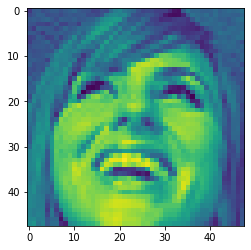

In [ ]:
img={'angry':'/content/data/train/angry/Training_10118481.jpg',
'disgust':'/content/data/train/disgust/Training_10371709.jpg',
'fear':'/content/data/train/fear/Training_10018621.jpg',
'happy':'/content/data/train/happy/Training_10019449.jpg',
'neutral':'/content/data/train/neutral/Training_10002154.jpg',
'sad':'/content/data/train/sad/Training_10091569.jpg',
'surprise':'/content/data/train/surprise/Training_1009179.jpg'}
pth=''
vals=img.values()
keys=[i for i in img.keys()]
j=0
imag=''
for i in vals:
  imag=plt.imread(i)
  plt.imshow(imag)
  print("The face emotion is: ",keys[j])
  j+=1
  plt.show()

In [ ]:
print("The surprised face is just a ndarray")
print(imag)

The surprised face is just a ndarray
[[ 53  76  80 ...  89  91  97]
 [ 65  74  84 ...  83  81  90]
 [ 77  81  77 ...  86  93  97]
 ...
 [112 106 112 ...  73  46  71]
 [116 118 108 ...  73  45  75]
 [120 128 101 ...  66  44  78]]


## 5. Creating the CNN model

In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(64, padding='same', kernel_size=(3, 3), input_shape=(48,48,1)))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(5, 5), padding='same'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(512, kernel_size=(3, 3), padding='same'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(256))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(Dropout(0.25))
emotion_model.add(Dense(512))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(Dropout(0.25))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
cv2.ocl.setUseOpenCL(False)

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

## 6. Iterating the model and generating accuracy metrics

In [ ]:
emotion_model_info = emotion_model.fit(
        train_generator,
        epochs=31,
        steps_per_epoch=448,
        validation_data=validation_generator,
        validation_steps=7178 // 64
        )

Epoch 1/31
448/448 [==============================] - 1013s 2s/step - loss: 1.8319 - accuracy: 0.3084 - val_loss: 1.8268 - val_accuracy: 0.3267
Epoch 2/31
448/448 [==============================] - 998s 2s/step - loss: 1.6006 - accuracy: 0.3894 - val_loss: 1.4844 - val_accuracy: 0.4280
Epoch 3/31
448/448 [==============================] - 998s 2s/step - loss: 1.4681 - accuracy: 0.4419 - val_loss: 1.3769 - val_accuracy: 0.4749
Epoch 4/31
448/448 [==============================] - 996s 2s/step - loss: 1.3767 - accuracy: 0.4754 - val_loss: 1.2864 - val_accuracy: 0.5053
Epoch 5/31
448/448 [==============================] - 995s 2s/step - loss: 1.2952 - accuracy: 0.5081 - val_loss: 1.3692 - val_accuracy: 0.4902
Epoch 6/31
448/448 [==============================] - 996s 2s/step - loss: 1.2313 - accuracy: 0.5323 - val_loss: 1.2296 - val_accuracy: 0.5374
Epoch 7/31
448/448 [==============================] - 1001s 2s/step - loss: 1.1790 - accuracy: 0.5545 - val_loss: 1.1714 - val_accuracy: 0.55

## 7. Plotting the accuracy and the loss 

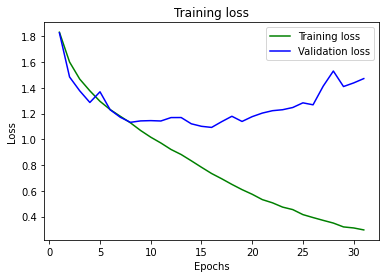

In [ ]:
loss_train = emotion_model_info.history['loss']
loss_train_val = emotion_model_info.history['val_loss']
epochs = range(1,32)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_train_val, 'b', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

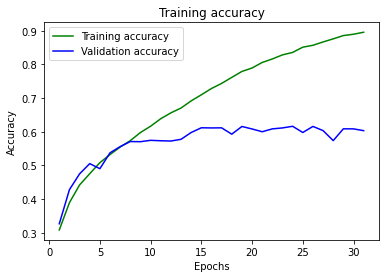

In [ ]:
acc_train = emotion_model_info.history['accuracy']
acc_train_val = emotion_model_info.history['val_accuracy']
epochs = range(1,32)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_train_val, 'b', label='Validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 8. Final prediction and analysis

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

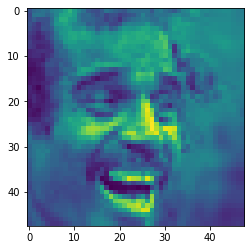

The emotion in the face of the person is:  happy


In [ ]:
from keras.preprocessing import image
img_path='/content/data/train/happy/Training_10046809.jpg'
img_happy=plt.imread(img_path)
plt.imshow(img_happy)
plt.show()
test_image = img_happy
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
res = emotion_model.predict(test_image)
# print(result)
def predictionImage(result):
  prediction=''
  ans=np.argmax(result)
  if ans == 0:
    prediction = 'angry'
  elif ans == 1:
    prediction = 'disgusted'
  elif ans == 2:
    prediction = 'fearful'
  elif ans == 3:
    prediction = 'happy'
  elif ans == 4:
    prediction = 'neutral'
  elif ans == 5:
    prediction = 'sad'
  elif ans == 6:
    prediction = 'surprised'
  return prediction

print("The emotion in the face of the person is: ",predictionImage(res))


The emotion in the face of the person is:  angry


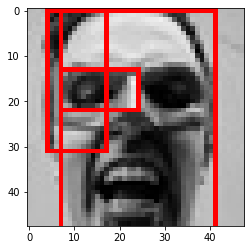

In [ ]:
from google.colab.patches import cv2_imshow
img=plt.imread('/content/data/train/angry/Training_10315441.jpg')
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
color_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for i in contours:
  x,y,w,h = cv2.boundingRect(i)
  cv2.rectangle(color_img, (x, y), (x + w, y + h), (255,0,0), 1)
plt.imshow(color_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
test_image_sur = img
test_image_sur = image.img_to_array(test_image_sur)
test_image_sur = np.expand_dims(test_image_sur, axis = 0)
res = emotion_model.predict(test_image_sur)
print("The emotion in the face of the person is: ",predictionImage(res))